In [33]:
import pandas as pd
# Create three df's for the coronavirus data for the 23-3, 23-4 and 23-5 excel sheets 
my_file = pd.ExcelFile('Coronavirus_Data.xlsx')
df_3 =pd.read_excel(my_file,sheet_name= '23-3',skipfooter = 1)
df_4 =pd.read_excel(my_file,sheet_name= '23-4',skipfooter = 1)
df_5 =pd.read_excel(my_file,sheet_name= '23-5',skipfooter = 1)

#they are different rows and different columns 
#rename 'Country,' column to  'Country' in two first sheets
df_3.rename(columns ={'Country,':'Country'},inplace = True)
df_4.rename(columns ={'Country,':'Country'},inplace = True)
df_3.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'Active Cases', 'Serious/Critical',
       'Total Cases/ 1M pop', 'Total Deaths per 1M pop'],
      dtype='object')

In [34]:
print(df_4.columns)
df_4.rename(columns ={'Total Deaths per 1M pop':'Total Deaths/ 1M pop'},inplace = True)

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'Active Cases', 'Serious/Critical',
       'Total Cases/ 1M pop', 'Total Deaths/ 1M pop', 'Total Tests',
       'Tests/1M pop', 'Notes'],
      dtype='object')


In [35]:
df_5.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'Active Cases', 'Serious/Critical',
       'Total Cases/ 1M pop', 'Total Deaths/ 1M pop', 'Total Tests',
       'Tests/1M pop', 'Population'],
      dtype='object')

In [43]:
# Add a datetime/Timestamp column for the date that corresponds to the sheet name
df_3=df_3.assign(Date = pd.to_datetime ('23/3/2020', format = '%d/%m/%Y'))
df_4=df_4.assign(Date = pd.to_datetime ('23/4/2020', format = '%d/%m/%Y'))
df_5=df_5.assign(Date = pd.to_datetime ('23/5/2020', format = '%d/%m/%Y'))

In [40]:
# Then merged.concatenate the 3 df's in to one single new df
merged=pd.concat([df_3,df_4,df_5],ignore_index=True)

In [41]:
# Using the new merged df show the rows for "Ireland"
df_ire = merged[merged['Country']=='Ireland']
# Using the new merged df show the rows for "Sweden"
df_swe = merged[merged['Country']=='Sweden']
df_swe

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/ 1M pop,Total Deaths per 1M pop,Date,Total Deaths/ 1M pop,Total Tests,Tests/1M pop,Notes,Population
16,Sweden,2046,112.0,27.0,6.0,16.0,2003.0,104.0,203.0,3.0,2020-03-23,NaN,NaN,NaN,NaN,NaN
215,Sweden,16755,751.0,2021.0,84.0,550.0,14184.0,533.0,1659.0,NaN,2020-04-23,200.0,94500.0,9357.0,NaN,NaN
431,Sweden,33188,379.0,3992.0,67.0,4971.0,24225.0,265.0,3288.0,NaN,2020-05-23,396.0,209900.0,20797.0,NaN,10092714.0


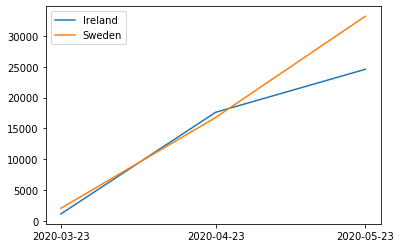

In [42]:
# Draw plots (plt.plt - line plot) of the dates vs total cases for "Ireland" and "Sweeden"

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_ire['Date'],df_ire['Total Cases'],label = 'Ireland')
plt.plot(df_swe['Date'],df_swe['Total Cases'],label = 'Sweden')

plt.xticks(ticks= df_ire['Date'])
plt.legend()
plt.show()